## Data import and cleaning

___

### Import Libraries

In [1]:
# import the necessary libraries for data preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

___

### Function to drop outliers

In [2]:
def drop_outliers(df):
    # calculate IQR (interquartile range)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # determine the outliers based on IQR
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

    # drop the outliers
    df_outliers_dropped = df[~outliers.any(axis=1)]

    return df_outliers_dropped

### Function to compare dataframes for 3 columns - town, flat_type and residential

In [3]:
def compare_dataframes(df1, df2):
    columns_to_compare = [
        "town",
        "flat_type",
        "residential"
    ]
    
    for column in columns_to_compare:
        num_unique_values_df1 = len(df1[column].unique())
        num_unique_values_df2 = len(df2[column].unique())
        if num_unique_values_df1 != num_unique_values_df2:
            print(f"Number of unique values for column '{column}' is different: {num_unique_values_df1} in df_train vs {num_unique_values_df2} in df_test")


___

### Import Dataset

In [4]:
# import train.csv and test.csv
# to perform cleaning of datasets for EDA and ML
df_train = pd.read_csv('../datasets/train.csv', low_memory=False)
df_test = pd.read_csv('../datasets/test.csv', low_memory=False)

# set max_rows and max_columns to enable readability
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
# identify the shape of df_train
df_train.shape

(150634, 77)

In [6]:
# identify the shape of df_test
df_test.shape

(16737, 76)

___

### Drop irrelevant columns

Based on literature research (see README.md), there are irrelevant columns that do not contribute to the analysis. As a result, these columns will be excluded.

In [7]:
# drop columns from train.csv
df_train = df_train.drop(columns=['id', 'Tranc_YearMonth', 'block', 'street_name', 'storey_range' ,'floor_area_sqm',
                              'flat_model', 'mid_storey', 'lower', 'upper', 'mid', 'full_flat_type', 'address',
                              'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion',
                              'total_dwelling_units', '1room_rental', '2room_rental', '3room_rental',
                              'other_room_rental', 'postal', 'planning_area', 'Mall_Within_500m',
                              'Mall_Within_1km', 'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Within_500m',
                              'Hawker_Within_1km', 'Hawker_Within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
                              'mrt_name', 'bus_interchange', 'mrt_interchange', 'bus_stop_name',
                              'pri_sch_name', 'vacancy', 'pri_sch_affiliation', 'sec_sch_name', 'cutoff_point',
                              'affiliation', 'lease_commence_date', 'year_completed', 'mrt_latitude',
                              'mrt_longitude', 'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_latitude', 'pri_sch_longitude',
                              'sec_sch_longitude', 'sec_sch_latitude'])

In [8]:
# similarly, drop the columns from test.csv
df_test = df_test.drop(columns=['id', 'Tranc_YearMonth', 'block', 'street_name', 'storey_range' ,'floor_area_sqm',
                              'flat_model', 'mid_storey', 'lower', 'upper', 'mid', 'full_flat_type', 'address',
                              'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion',
                              'total_dwelling_units', '1room_rental', '2room_rental', '3room_rental',
                              'other_room_rental', 'postal', 'planning_area', 'Mall_Within_500m',
                              'Mall_Within_1km', 'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Within_500m',
                              'Hawker_Within_1km', 'Hawker_Within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
                              'mrt_name', 'bus_interchange', 'mrt_interchange', 'bus_stop_name',
                              'pri_sch_name', 'vacancy', 'pri_sch_affiliation', 'sec_sch_name', 'cutoff_point',
                              'affiliation', 'lease_commence_date', 'year_completed', 'mrt_latitude',
                              'mrt_longitude', 'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_latitude', 'pri_sch_longitude',
                              'sec_sch_longitude', 'sec_sch_latitude'])

___

### Overview

In [9]:
# examine the data types of df_train
df_train.dtypes

town                          object
flat_type                     object
resale_price                 float64
Tranc_Year                     int64
Tranc_Month                    int64
floor_area_sqft              float64
hdb_age                        int64
max_floor_lvl                  int64
residential                   object
1room_sold                     int64
2room_sold                     int64
3room_sold                     int64
4room_sold                     int64
5room_sold                     int64
exec_sold                      int64
multigen_sold                  int64
studio_apartment_sold          int64
Latitude                     float64
Longitude                    float64
Mall_Nearest_Distance        float64
Hawker_Nearest_Distance      float64
mrt_nearest_distance         float64
bus_stop_nearest_distance    float64
pri_sch_nearest_distance     float64
sec_sch_nearest_dist         float64
dtype: object

In [10]:
# similarly, for df_test
df_test.dtypes

town                          object
flat_type                     object
Tranc_Year                     int64
Tranc_Month                    int64
floor_area_sqft              float64
hdb_age                        int64
max_floor_lvl                  int64
residential                   object
1room_sold                     int64
2room_sold                     int64
3room_sold                     int64
4room_sold                     int64
5room_sold                     int64
exec_sold                      int64
multigen_sold                  int64
studio_apartment_sold          int64
Latitude                     float64
Longitude                    float64
Mall_Nearest_Distance        float64
Hawker_Nearest_Distance      float64
mrt_nearest_distance         float64
bus_stop_nearest_distance    float64
pri_sch_nearest_distance     float64
sec_sch_nearest_dist         float64
dtype: object

In [11]:
df_train.head(3)

,town,flat_type,resale_price,Tranc_Year,Tranc_Month,floor_area_sqft,hdb_age,max_floor_lvl,residential,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,Latitude,Longitude,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist
0,KALLANG/WHAMPOA,4 ROOM,680000.0,2016,5,968.760,15,25,Y,0,0,0,96,46,0,0,0,1.314299,103.872828,1094.090418,154.753357,330.083069,29.427395,1138.633422,1138.633422
1,BISHAN,5 ROOM,665000.0,2012,7,1399.320,34,9,Y,0,0,0,56,56,0,0,0,1.346086,103.855078,866.941448,640.151925,903.659703,58.207761,415.607357,447.894399
2,BUKIT BATOK,EXECUTIVE,838000.0,2013,7,1550.016,24,16,Y,0,0,0,0,30,60,0,0,1.343867,103.760535,1459.579948,1762.082341,1334.251197,214.747860,498.849039,180.074558


In [12]:
df_test.head(3)

,town,flat_type,Tranc_Year,Tranc_Month,floor_area_sqft,hdb_age,max_floor_lvl,residential,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,Latitude,Longitude,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist
0,YISHUN,4 ROOM,2012,11,904.176,34,12,Y,0,0,0,92,40,0,0,0,1.437066,103.831121,877.431572,687.576779,686.660434,75.683952,426.467910,156.322353
1,JURONG WEST,5 ROOM,2019,8,1205.568,13,14,Y,0,0,0,28,25,0,0,0,1.336957,103.695668,534.037705,2122.346226,169.478175,88.993058,439.756851,739.371688
2,ANG MO KIO,3 ROOM,2013,10,731.952,41,12,Y,0,0,191,22,1,1,0,0,1.374058,103.854168,817.050453,152.287621,694.220448,86.303575,355.882207,305.071191


___

### Check categorical values within dataframes

In [13]:
# check for difference in unique values of categorical features
compare_dataframes(df_train, df_test)

In [14]:
df_train['town'].unique()

array(['KALLANG/WHAMPOA', 'BISHAN', 'BUKIT BATOK', 'YISHUN', 'GEYLANG',
       'HOUGANG', 'BEDOK', 'SENGKANG', 'TAMPINES', 'SERANGOON',
       'BUKIT MERAH', 'BUKIT PANJANG', 'WOODLANDS', 'JURONG WEST',
       'TOA PAYOH', 'CHOA CHU KANG', 'SEMBAWANG', 'ANG MO KIO',
       'PASIR RIS', 'CLEMENTI', 'PUNGGOL', 'JURONG EAST', 'CENTRAL AREA',
       'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'], dtype=object)

In [15]:
df_test['town'].unique()

array(['YISHUN', 'JURONG WEST', 'ANG MO KIO', 'WOODLANDS', 'BUKIT BATOK',
       'BEDOK', 'PUNGGOL', 'KALLANG/WHAMPOA', 'CHOA CHU KANG',
       'QUEENSTOWN', 'BUKIT MERAH', 'JURONG EAST', 'TAMPINES', 'SENGKANG',
       'GEYLANG', 'PASIR RIS', 'CLEMENTI', 'MARINE PARADE', 'HOUGANG',
       'SEMBAWANG', 'BUKIT PANJANG', 'TOA PAYOH', 'SERANGOON', 'BISHAN',
       'BUKIT TIMAH', 'CENTRAL AREA'], dtype=object)

In [16]:
df_train['flat_type'].unique()

array(['4 ROOM', '5 ROOM', 'EXECUTIVE', '3 ROOM', '2 ROOM', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [17]:
df_test['flat_type'].unique()

array(['4 ROOM', '5 ROOM', '3 ROOM', 'EXECUTIVE', '2 ROOM', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [18]:
df_train['residential'].unique()

array(['Y'], dtype=object)

In [19]:
df_test['residential'].unique()

array(['Y'], dtype=object)

***Key Findings*** 
- For both df_train and df_test, "residential" feature has only 1 unique value
- Thus it shall be dropped as it will not add value to the analysis or modelling.
- For the remaining cateogrical values, they have the same number of unique values.

In [20]:
# drop 'residential' column from df_train dataframe
df_train.drop(columns=['residential'], inplace=True)

In [21]:
# drop 'residential' column from df_test dataframe
df_test.drop(columns=['residential'], inplace=True)

___

#### Dealing with null values

In [22]:
# display number of nulls (if any) for all features
df_train.isnull().sum()

town                           0
flat_type                      0
resale_price                   0
Tranc_Year                     0
Tranc_Month                    0
floor_area_sqft                0
hdb_age                        0
max_floor_lvl                  0
1room_sold                     0
2room_sold                     0
3room_sold                     0
4room_sold                     0
5room_sold                     0
exec_sold                      0
multigen_sold                  0
studio_apartment_sold          0
Latitude                       0
Longitude                      0
Mall_Nearest_Distance        829
Hawker_Nearest_Distance        0
mrt_nearest_distance           0
bus_stop_nearest_distance      0
pri_sch_nearest_distance       0
sec_sch_nearest_dist           0
dtype: int64

In [23]:
df_test.isnull().sum()

town                          0
flat_type                     0
Tranc_Year                    0
Tranc_Month                   0
floor_area_sqft               0
hdb_age                       0
max_floor_lvl                 0
1room_sold                    0
2room_sold                    0
3room_sold                    0
4room_sold                    0
5room_sold                    0
exec_sold                     0
multigen_sold                 0
studio_apartment_sold         0
Latitude                      0
Longitude                     0
Mall_Nearest_Distance        84
Hawker_Nearest_Distance       0
mrt_nearest_distance          0
bus_stop_nearest_distance     0
pri_sch_nearest_distance      0
sec_sch_nearest_dist          0
dtype: int64

##### Null values for Mall_Nearest_Distance

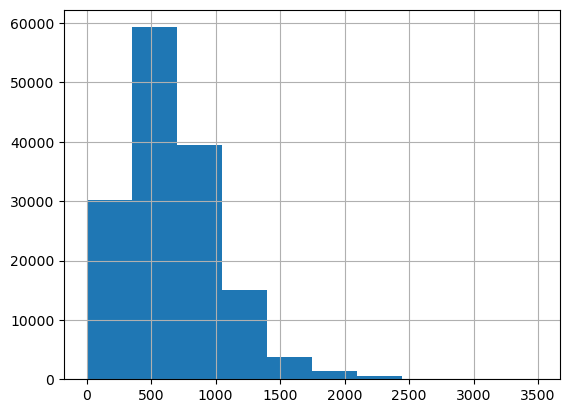

In [24]:
df_train['Mall_Nearest_Distance'].hist();

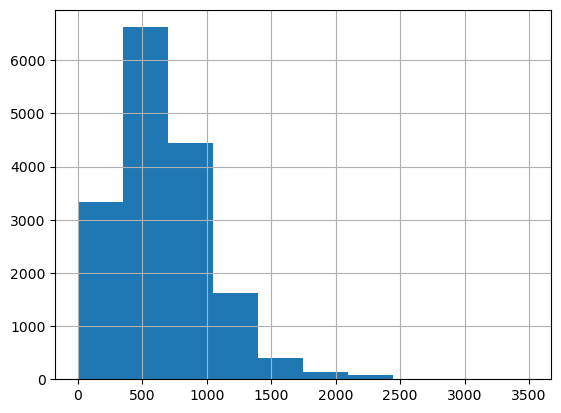

In [25]:
df_test['Mall_Nearest_Distance'].hist();

***Key Findings***
- Mall nearest distance is right-skewed.
- Imputing mean would be a bad choice.
- Impute median instead.

In [26]:
# percentage of nulls for entire dataframe
df_train['Mall_Nearest_Distance'].isnull().sum()/df_train['Mall_Nearest_Distance'].count()

0.0055338606855578915

In [27]:
# percentage of nulls for entire dataframe
df_test['Mall_Nearest_Distance'].isnull().sum()/df_test['Mall_Nearest_Distance'].count()

0.005044136191677175

***Key Findings***
- For df_train, 0.5% or 829/150634 rows of the Mall_Nearest_Distance feature are nulls.
- For df_test, 0.5% or 824/16737 rows of the Mall_Nearest_Distance feature are nulls.

In [28]:
# fill the null values with median values
df_train['Mall_Nearest_Distance'] = df_train['Mall_Nearest_Distance'].fillna(df_train['Mall_Nearest_Distance'].median())
df_test['Mall_Nearest_Distance'] = df_test['Mall_Nearest_Distance'].fillna(df_test['Mall_Nearest_Distance'].median())

In [29]:
# confirm all null values are handled
df_train.isnull().sum()

town                         0
flat_type                    0
resale_price                 0
Tranc_Year                   0
Tranc_Month                  0
floor_area_sqft              0
hdb_age                      0
max_floor_lvl                0
1room_sold                   0
2room_sold                   0
3room_sold                   0
4room_sold                   0
5room_sold                   0
exec_sold                    0
multigen_sold                0
studio_apartment_sold        0
Latitude                     0
Longitude                    0
Mall_Nearest_Distance        0
Hawker_Nearest_Distance      0
mrt_nearest_distance         0
bus_stop_nearest_distance    0
pri_sch_nearest_distance     0
sec_sch_nearest_dist         0
dtype: int64

In [30]:
# confirm all null values are handled
df_test.isnull().sum()

town                         0
flat_type                    0
Tranc_Year                   0
Tranc_Month                  0
floor_area_sqft              0
hdb_age                      0
max_floor_lvl                0
1room_sold                   0
2room_sold                   0
3room_sold                   0
4room_sold                   0
5room_sold                   0
exec_sold                    0
multigen_sold                0
studio_apartment_sold        0
Latitude                     0
Longitude                    0
Mall_Nearest_Distance        0
Hawker_Nearest_Distance      0
mrt_nearest_distance         0
bus_stop_nearest_distance    0
pri_sch_nearest_distance     0
sec_sch_nearest_dist         0
dtype: int64

___

#### Convert some float64 values to int

In [31]:
df_train[['floor_area_sqft']] = df_train[['floor_area_sqft']].astype(int)

In [32]:
df_test[['floor_area_sqft']] = df_test[['floor_area_sqft']].astype(int)

___

#### Dealing with outliers

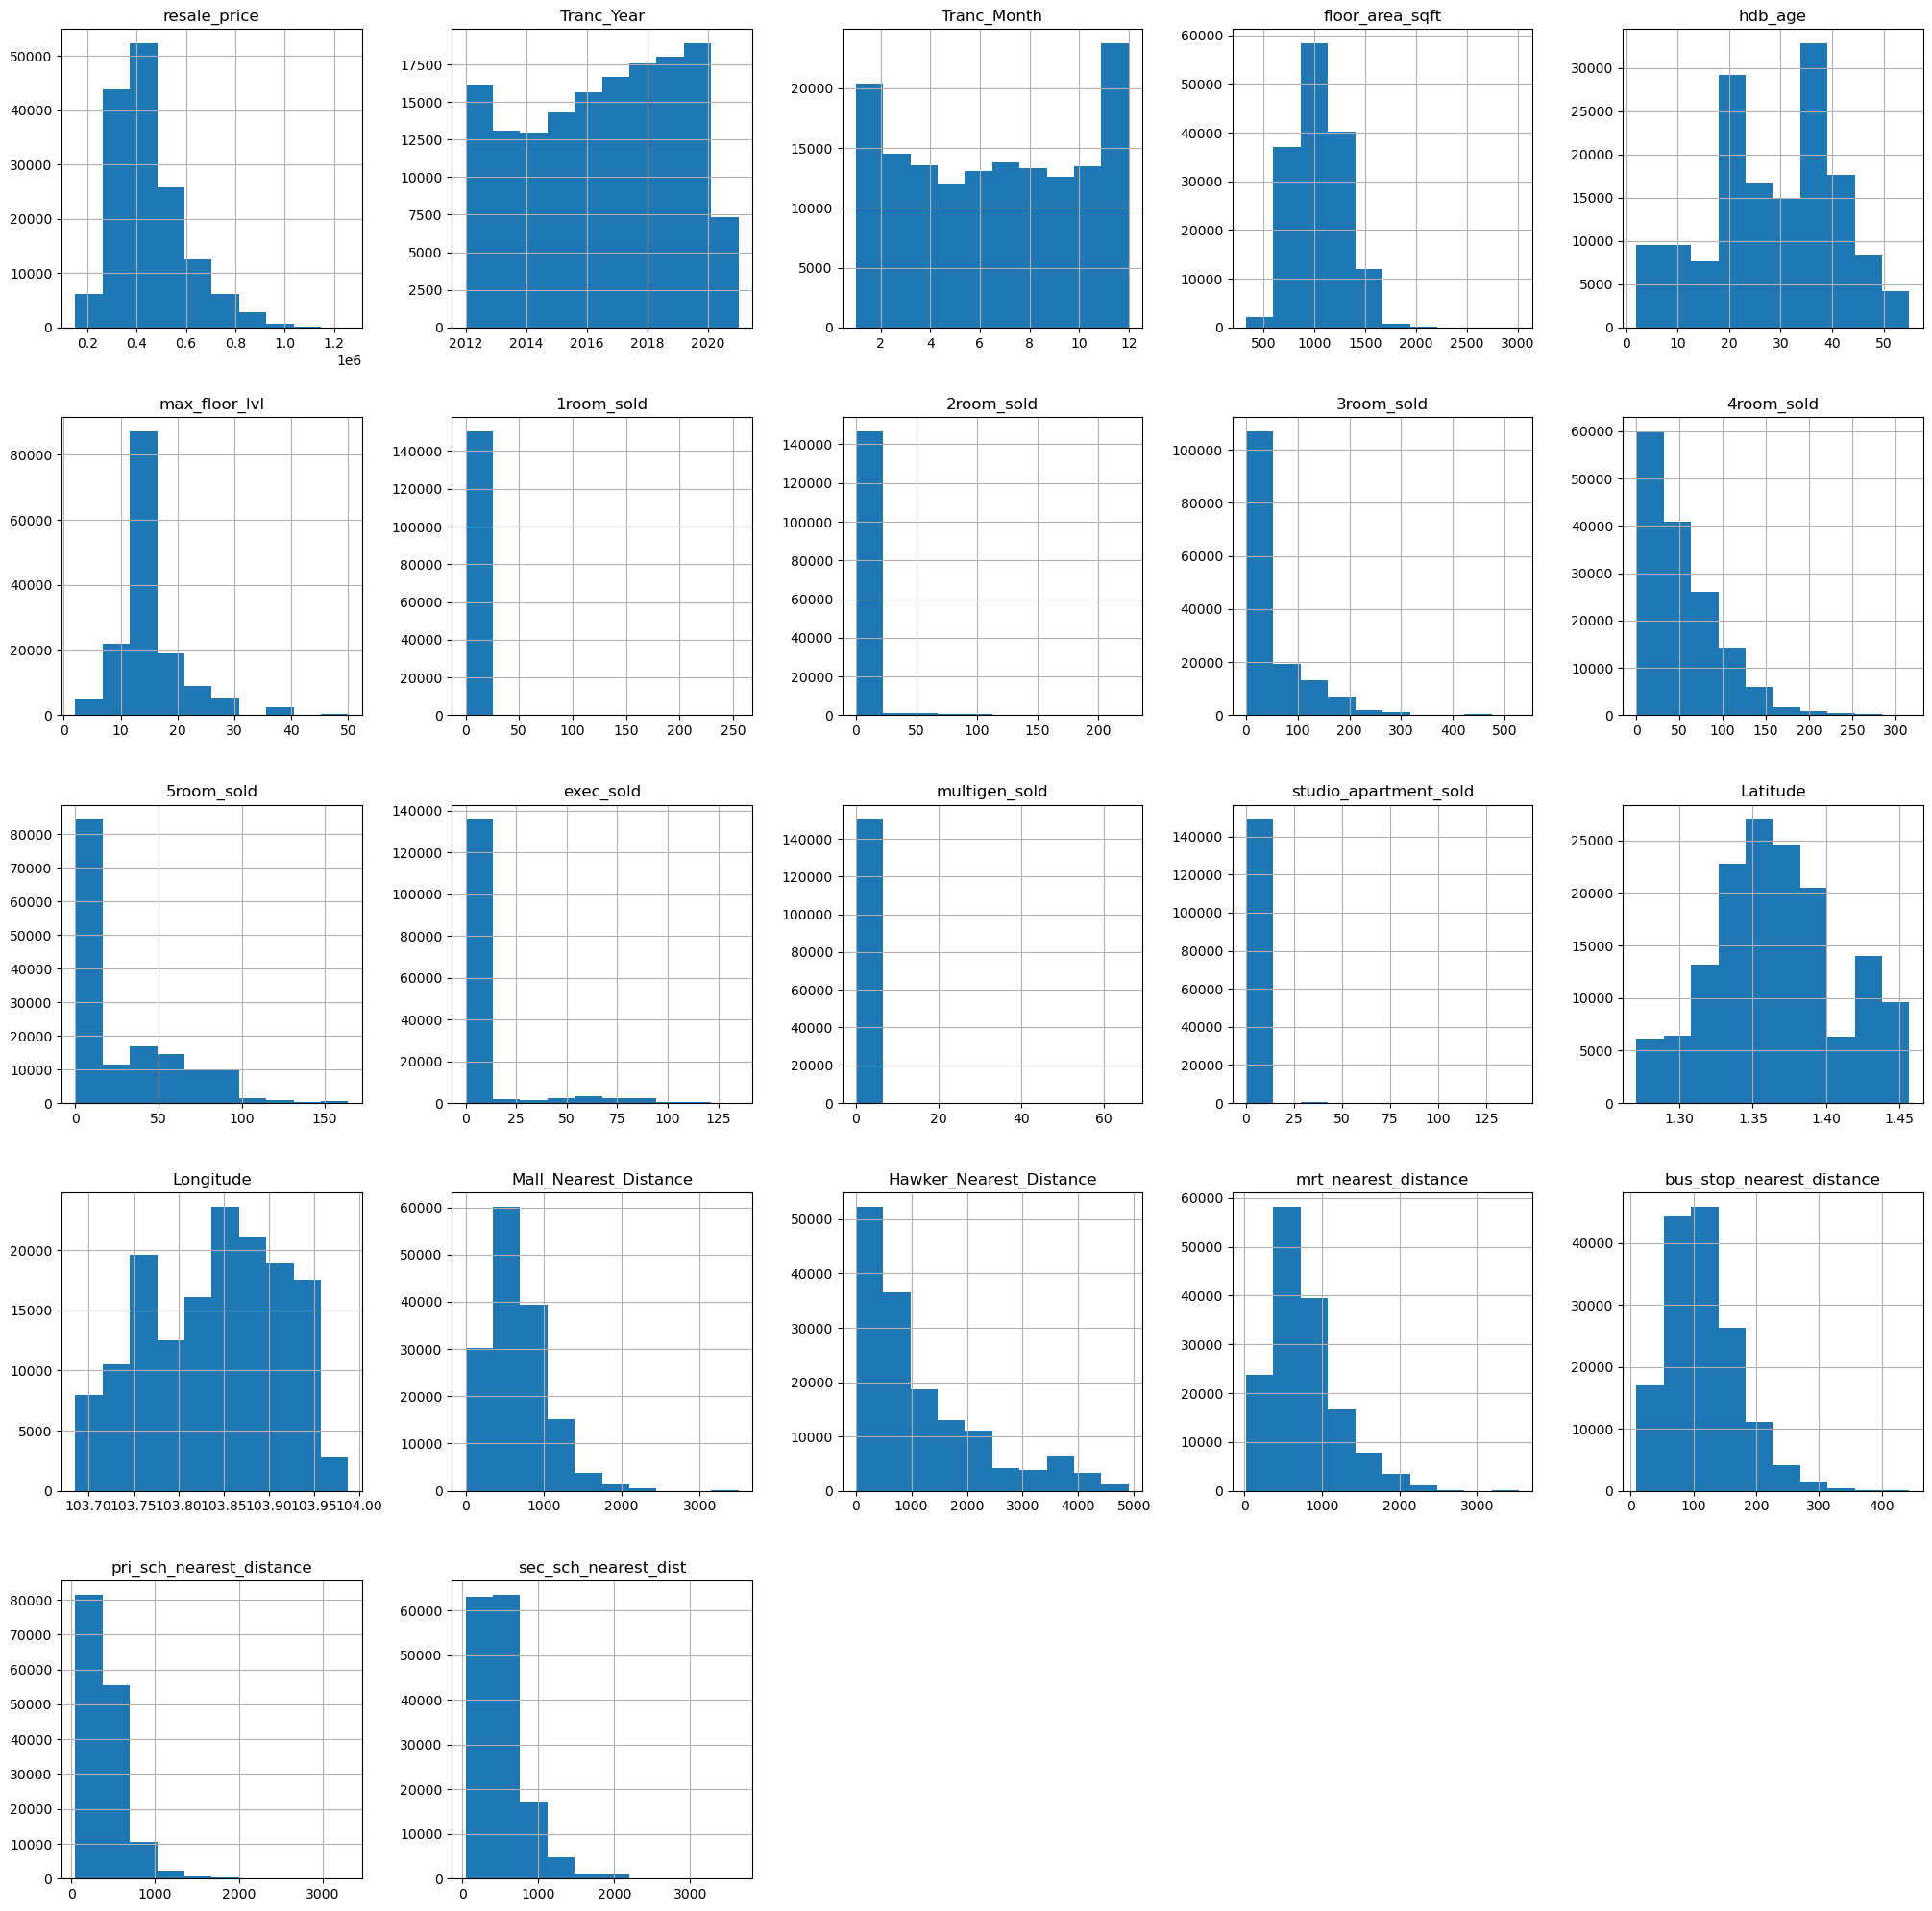

In [33]:
# histogram plot of entire dataframe
df_train.hist(figsize=(25, 25));

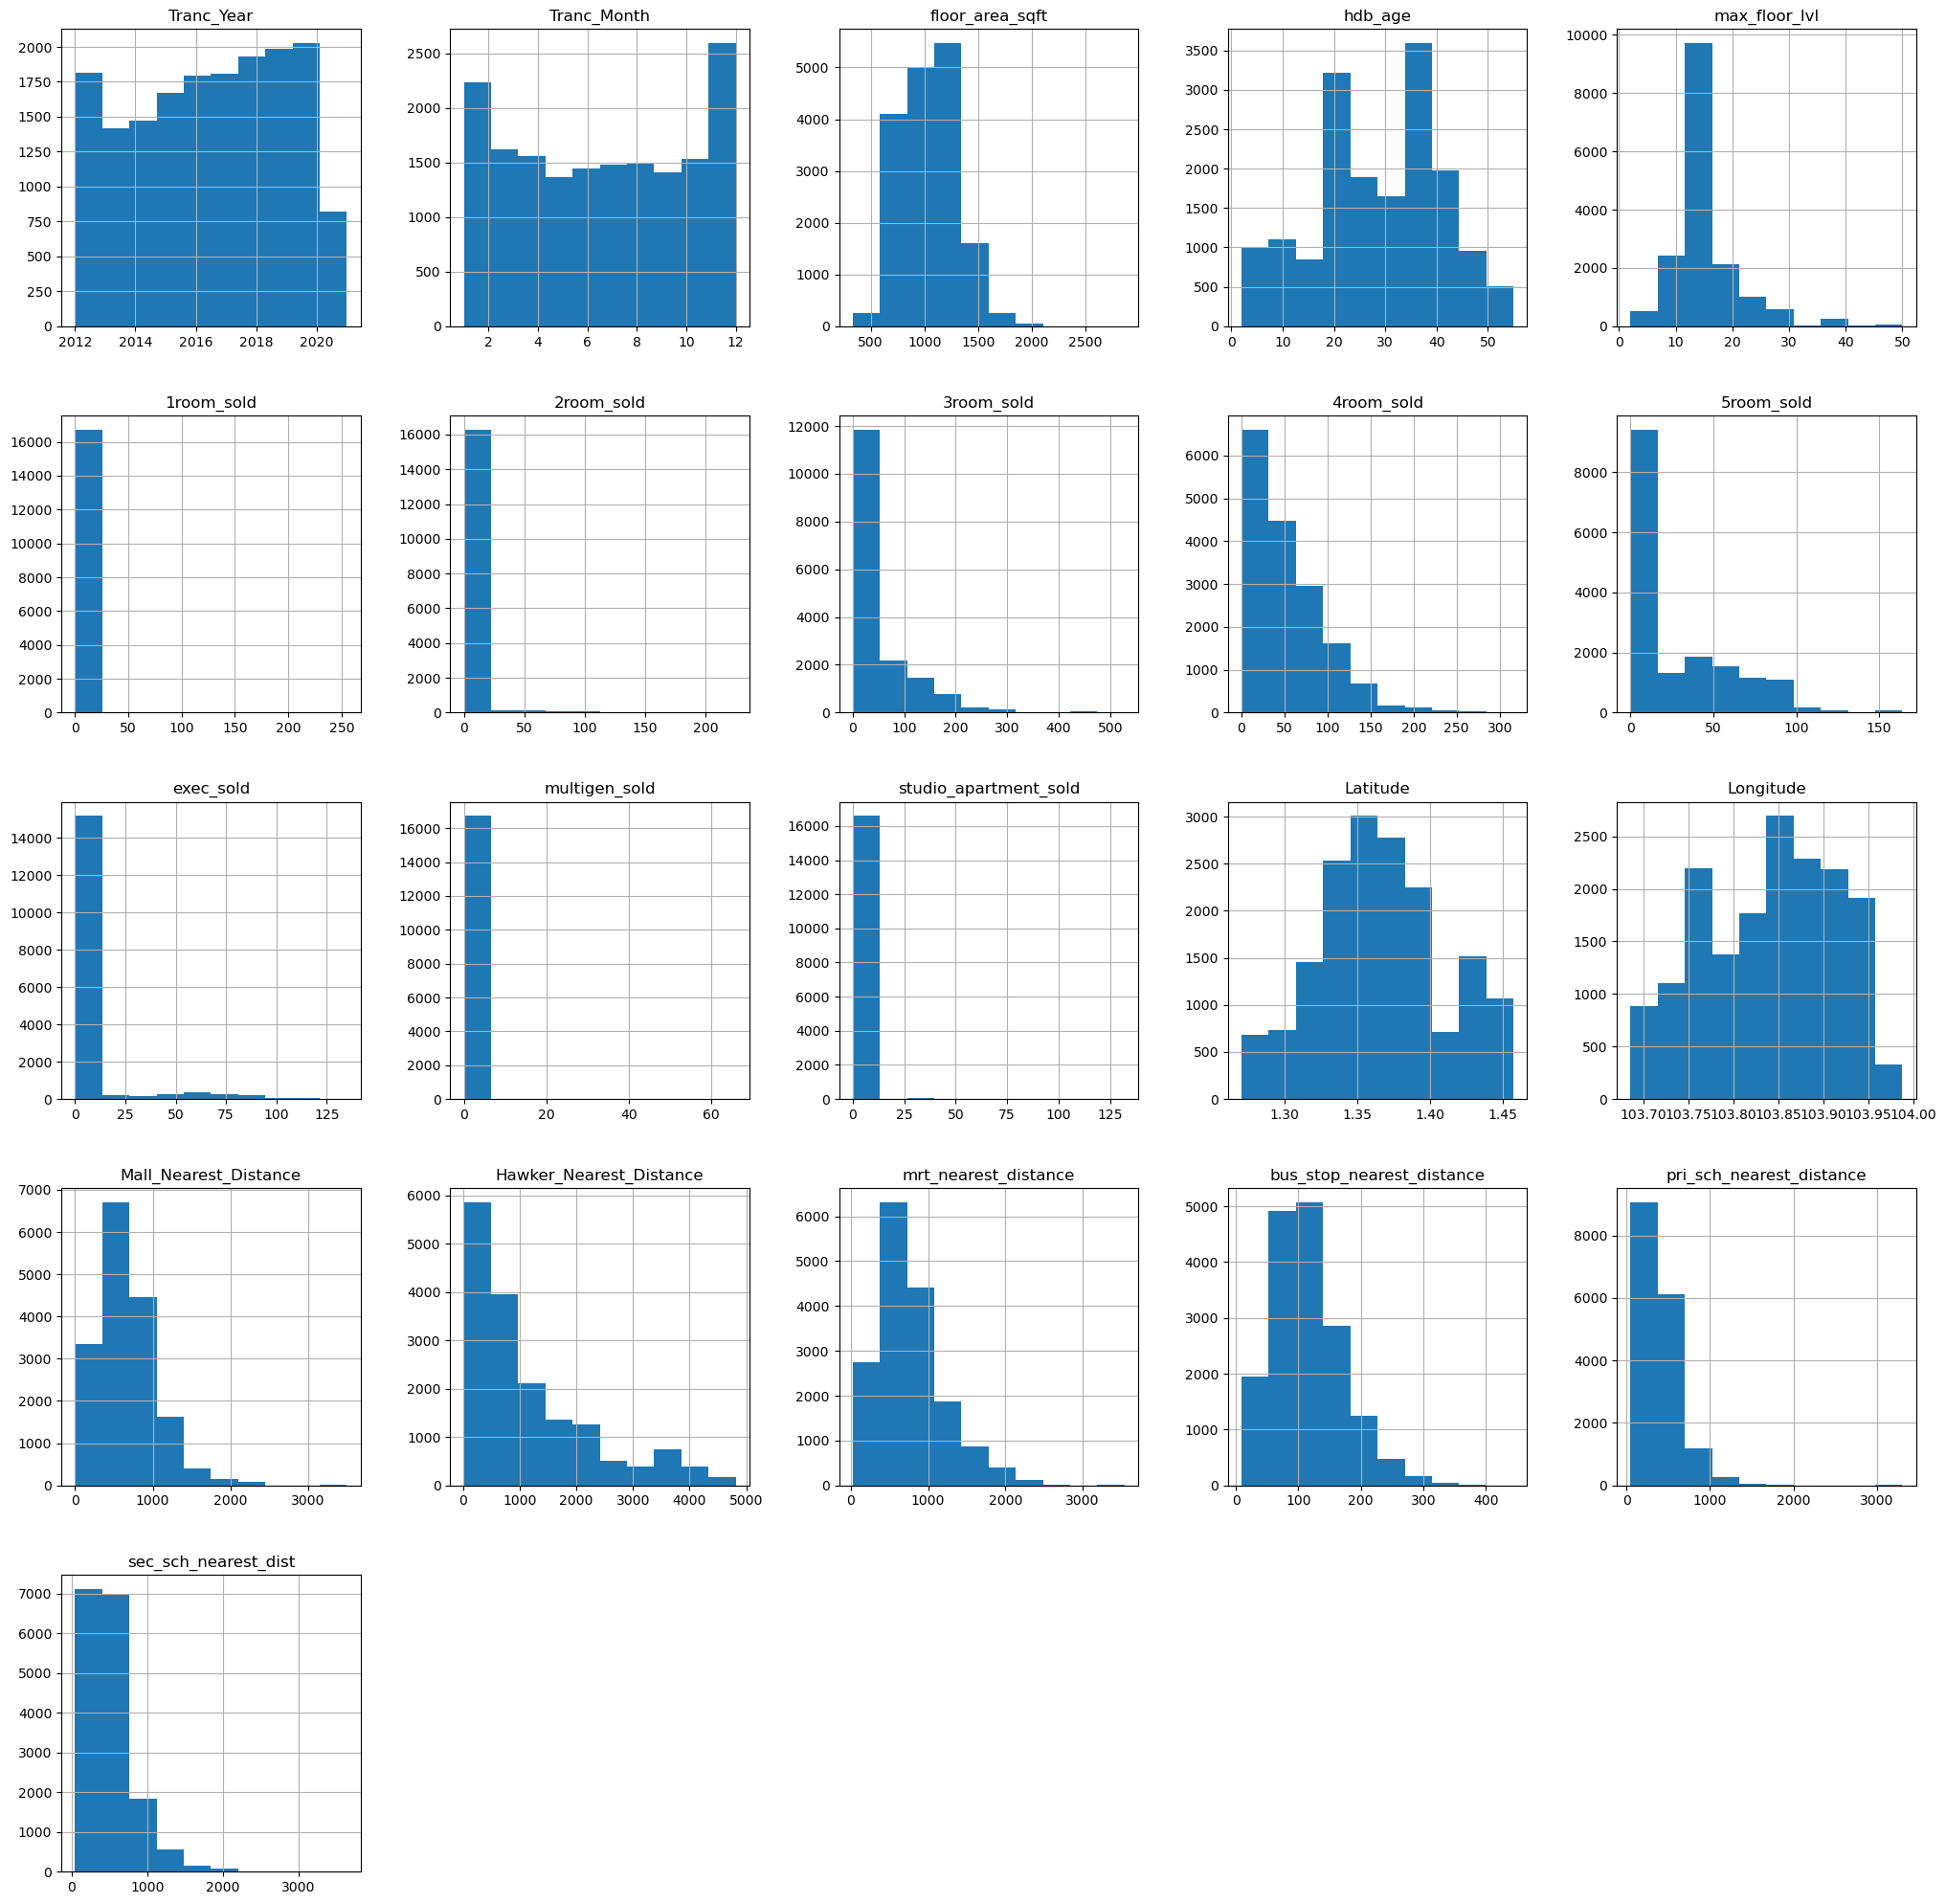

In [34]:
# histogram plot of entire dataframe
df_test.hist(figsize=(25, 25));

In [35]:
# setup IQR
Q1_train = df_train.quantile(0.25)
Q3_train = df_train.quantile(0.75)
IQR_train = Q3_train - Q1_train

Q1_test = df_test.quantile(0.25)
Q3_test = df_test.quantile(0.75)
IQR_test = Q3_test - Q1_test

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79785/198450893.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1_train = df_train.quantile(0.25)
/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79785/198450893.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3_train = df_train.quantile(0.75)
/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79785/198450893.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1_test = df_test.

In [36]:
# overview of the counts of outliers for each column
((df_train < (Q1_train - 1.5 * IQR_train)) | (df_train > (Q3_train + 1.5 * IQR_train))).sum()

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79785/1925273631.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df_train < (Q1_train - 1.5 * IQR_train)) | (df_train > (Q3_train + 1.5 * IQR_train))).sum()


1room_sold                      82
2room_sold                    6310
3room_sold                   10206
4room_sold                    3335
5room_sold                     996
Hawker_Nearest_Distance       8076
Latitude                         0
Longitude                        0
Mall_Nearest_Distance         3079
Tranc_Month                      0
Tranc_Year                       0
bus_stop_nearest_distance     2955
exec_sold                    26020
flat_type                        0
floor_area_sqft                465
hdb_age                          0
max_floor_lvl                20165
mrt_nearest_distance          5270
multigen_sold                   77
pri_sch_nearest_distance      4291
resale_price                  5220
sec_sch_nearest_dist          5891
studio_apartment_sold         1408
town                             0
dtype: int64

In [37]:
# overview of the counts of outliers for each column
((df_test < (Q1_test - 1.5 * IQR_test)) | (df_test > (Q3_test + 1.5 * IQR_test))).sum()

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79785/1360598716.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df_test < (Q1_test - 1.5 * IQR_test)) | (df_test > (Q3_test + 1.5 * IQR_test))).sum()


1room_sold                      7
2room_sold                    710
3room_sold                   1134
4room_sold                    370
5room_sold                    100
Hawker_Nearest_Distance       902
Latitude                        0
Longitude                       0
Mall_Nearest_Distance         334
Tranc_Month                     0
Tranc_Year                      0
bus_stop_nearest_distance     320
exec_sold                    2821
flat_type                       0
floor_area_sqft                64
hdb_age                         0
max_floor_lvl                2210
mrt_nearest_distance          566
multigen_sold                  10
pri_sch_nearest_distance      475
sec_sch_nearest_dist          708
studio_apartment_sold         145
town                            0
dtype: int64

<AxesSubplot: >

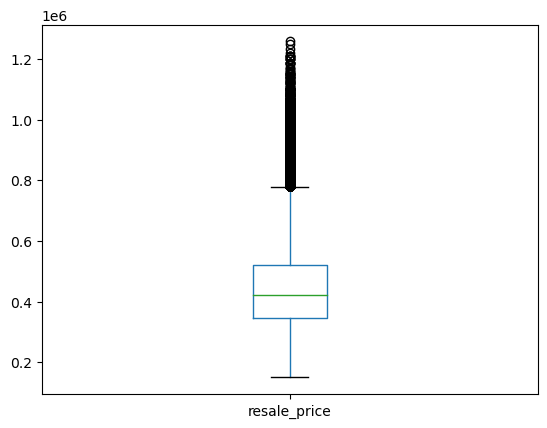

In [38]:
# closer look at some of the outliers - target variable
df_train.boxplot(column =['resale_price'], grid = False)

- 4,916 outliers for resale_price

<AxesSubplot: >

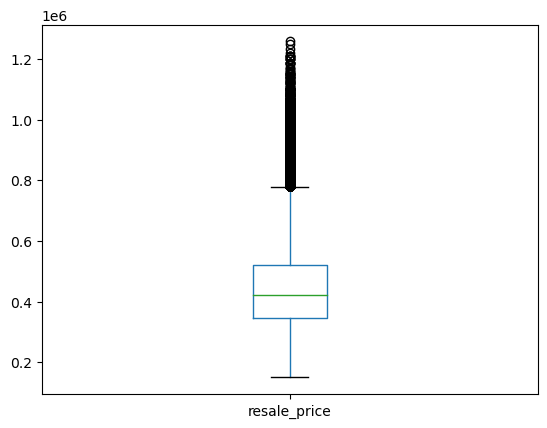

In [39]:
df_train.boxplot(column =['resale_price'], grid = False)

<AxesSubplot: >

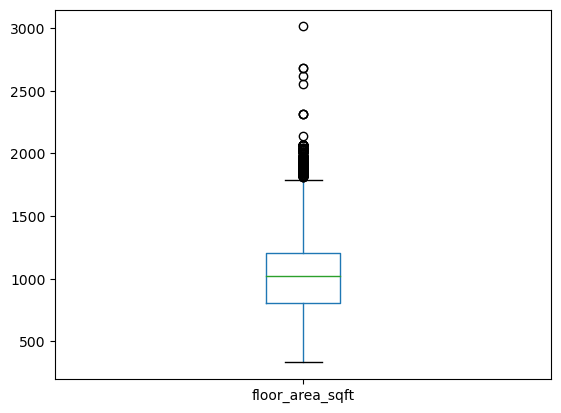

In [40]:
# closer look at some of the outliers - assumed strongest predictor
df_train.boxplot(column =['floor_area_sqft'], grid = False)

- 64 outliers for floor_area_sqft

#### How would the dataframe be like if all outliers were dropped?

In [41]:
df_without_outliers_train = drop_outliers(df_train)

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79785/836003738.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79785/836003738.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79785/836003738.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3

In [42]:
df_without_outliers_test = drop_outliers(df_test)

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79785/836003738.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79785/836003738.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_79785/836003738.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3

In [43]:
# shape of df_train if outliers are dropped
df_without_outliers_train.shape

(75924, 24)

In [44]:
# original shape of df_train
df_train.shape

(150634, 24)

In [45]:
# shape of df_test if outliers are dropped
df_without_outliers_test.shape

(8552, 23)

In [46]:
# original shape of df_test
df_test.shape

(16737, 23)

***Key Findings***
- If all outliers were to be dropped, this would account for majority of the entire dataset.
- This would mean that the outliers are not outliers per say.

___

### Export cleaned datasets

In [47]:
# exported for feature engineering in a separate notebook
df_train.to_csv('../datasets/train_cleaned.csv')
df_test.to_csv('../datasets/test_cleaned.csv')